## CitiBike System Data Exploration

### by Martin Tschendel

### Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering New
York. Source of data: [Link](https://www.bikeshare.com/data/)

In [170]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

compared to the data from the San Francisco Bay Area, we have nearly 10 times more entries for New York in 2018. At first I only take the dataset for May 2018, in order to reduce the calculation time. 

next I will load the dataset

In [171]:
#load in the dataset
data_1805_NY = pd.read_csv('data/201805-citibike-tripdata.csv')

I'm interested in some characteristics of the new data set

In [172]:
data_1805_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824710 entries, 0 to 1824709
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: float64(4), int64(6), object(5)
memory usage: 208.8+ MB


## Data Quality Issues
I figured out some data quality issues and plan to solve them for the upcoming investigation steps.
* data type of columns 'starttime' and 'stoptime' is object and not datetime
* usertype is object and not category
* some column names like 'start station id' have white spaces 
* datatype of start_station_id and end_station_id is float and not category
* gender is currently integer (Zero=unknown; 1=male; 2=female) and should be ideally changed to category (Zero->unknown; 1->male; 2->female) 

In [173]:
data_1805_NY.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,367,2018-05-01 05:06:16.5840,2018-05-01 05:12:23.9650,72,W 52 St & 11 Ave,40.767272,-73.993929,514,12 Ave & W 40 St,40.760875,-74.002777,30567,Subscriber,1965,1
1,1313,2018-05-01 06:25:49.4250,2018-05-01 06:47:42.7120,72,W 52 St & 11 Ave,40.767272,-73.993929,426,West St & Chambers St,40.717548,-74.013221,18965,Subscriber,1956,1
2,1798,2018-05-01 06:40:26.4450,2018-05-01 07:10:25.1790,72,W 52 St & 11 Ave,40.767272,-73.993929,3435,Grand St & Elizabeth St,40.718822,-73.995960,30241,Subscriber,1959,2
3,518,2018-05-01 07:06:02.9730,2018-05-01 07:14:41.0040,72,W 52 St & 11 Ave,40.767272,-73.993929,477,W 41 St & 8 Ave,40.756405,-73.990026,28985,Subscriber,1986,1
4,109,2018-05-01 07:26:32.3450,2018-05-01 07:28:21.5420,72,W 52 St & 11 Ave,40.767272,-73.993929,530,11 Ave & W 59 St,40.771522,-73.990541,14556,Subscriber,1991,1


In [174]:
# Change datetype of columns starttime and stoptime to datetime
data_1805_NY.starttime = pd.to_datetime(data_1805_NY.starttime)
data_1805_NY.stoptime = pd.to_datetime(data_1805_NY.stoptime)

In [175]:
# Check if datetype of columns starttime and stoptime is changed to datetime
data_1805_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824710 entries, 0 to 1824709
Data columns (total 15 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: datetime64[ns](2), float64(4), int64(6), object(3)
memory usage: 208.8+ MB


In [176]:
# Change datetype of column usertype from object to category
data_1805_NY.usertype = data_1805_NY.usertype.astype('category')

In [177]:
# Check if datetype of column usertype is changed to category
data_1805_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824710 entries, 0 to 1824709
Data columns (total 15 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   category
birth year                 int64
gender                     int64
dtypes: category(1), datetime64[ns](2), float64(4), int64(6), object(2)
memory usage: 196.6+ MB


In [178]:
#rename columns
data_1805_NY.rename(columns={'start station id':'start_station_id', 'end station id':'end_station_id'}, inplace=True)
data_1805_NY.rename(columns={'start station latitude':'start_station_latitude', 'end station latitude':'end_station_latitude'}, inplace=True)
data_1805_NY.rename(columns={'start station longitude':'start_station_longitude', 'end station longitude':'end_station_longitude'}, inplace=True)
data_1805_NY.rename(columns={'start station name':'start_station_name', 'end station name':'end_station_name'}, inplace=True)
data_1805_NY.rename(columns={'birth year':'birth_year'}, inplace=True)

In [179]:
#check if columns have been renamed
data_1805_NY.head(1)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,367,2018-05-01 05:06:16.584,2018-05-01 05:12:23.965,72,W 52 St & 11 Ave,40.767272,-73.993929,514,12 Ave & W 40 St,40.760875,-74.002777,30567,Subscriber,1965,1


In [180]:
# Convert the start_station_id and end_station_id column's data type from a float to a category 
data_1805_NY.start_station_id = data_1805_NY.start_station_id.astype('category')
data_1805_NY.end_station_id = data_1805_NY.end_station_id.astype('category')

In [181]:
#check if station id columns have been changed to categories
data_1805_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824710 entries, 0 to 1824709
Data columns (total 15 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id           category
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             category
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bikeid                     int64
usertype                   category
birth_year                 int64
gender                     int64
dtypes: category(3), datetime64[ns](2), float64(4), int64(4), object(2)
memory usage: 175.8+ MB


## What is the structure of my New York dataset?
There are 1.82 Mio. individual ride entries for May 2018 and there are 15 features. 

### Variables with quantitative nature
* `tripduration`
* `birth_year`

### Variables with qualitative/categorical nature
* `starttime` and `stoptime`
* `start_station_id` and `end_station_id`
* `start_station_name` and `end_station_name`
* `start_station_latitude` and `end_station_latitude`
* `start_station_longitude` and `end_station_longitude`
* `bikeid`
* `usertype`
* `gender`

## What are the main features of interest in my dataset?

### Sole exploration of New York dataset
* When are the most trips taken in terms of time of day, day of the week?
* How long does the average trip take?
* Does the above depend on the day of the week, or if the user is a Subscriber or Customer/ Male or Female/'old' or 'young'?
* Where are the stations located and how how many bikes are rented there per year?

### Comparative exploration of San Francisco and New York datasets
* When are the most trips taken in terms of time of day, day of the week?
* How long does the average trip take?
* Does the above depend on if the user is a Subscriber or Customer/ Male or Female/'old' or 'young'?


## What features in the dataset do I think will help support my investigation into my feature of interest?
My main features of interest in this dataset are each trip's start and end time. They can help me to answer the question when the most trips are taken in terms of time of day, day of the week or how long does the average trip take. Related to the third question mentioned above (regarding New York and San Francisco datasets), the features of user type, gender and age are important. In order to get an answer to the last question towards the New York dataset, the station's longitude, latitude and station's id is important.

## Univariate Exploration
At first I will start to look at the distribution of rides across different times intervalls: time of day and day of the week. Here I want to find answers to the question: When are most trips taken in terms of time of day or day of the week?

**Number of Rides Across Different Hours of the Day**

In [182]:
#extract the starting hours of each ride, store them in a series and convert series to dataframe
data_1805_NY['hour'] = data_1805_NY.starttime.dt.hour

In [183]:
data_1805_NY.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,hour
0,367,2018-05-01 05:06:16.584,2018-05-01 05:12:23.965,72,W 52 St & 11 Ave,40.767272,-73.993929,514,12 Ave & W 40 St,40.760875,-74.002777,30567,Subscriber,1965,1,5
1,1313,2018-05-01 06:25:49.425,2018-05-01 06:47:42.712,72,W 52 St & 11 Ave,40.767272,-73.993929,426,West St & Chambers St,40.717548,-74.013221,18965,Subscriber,1956,1,6
2,1798,2018-05-01 06:40:26.445,2018-05-01 07:10:25.179,72,W 52 St & 11 Ave,40.767272,-73.993929,3435,Grand St & Elizabeth St,40.718822,-73.995960,30241,Subscriber,1959,2,6
3,518,2018-05-01 07:06:02.973,2018-05-01 07:14:41.004,72,W 52 St & 11 Ave,40.767272,-73.993929,477,W 41 St & 8 Ave,40.756405,-73.990026,28985,Subscriber,1986,1,7
4,109,2018-05-01 07:26:32.345,2018-05-01 07:28:21.542,72,W 52 St & 11 Ave,40.767272,-73.993929,530,11 Ave & W 59 St,40.771522,-73.990541,14556,Subscriber,1991,1,7


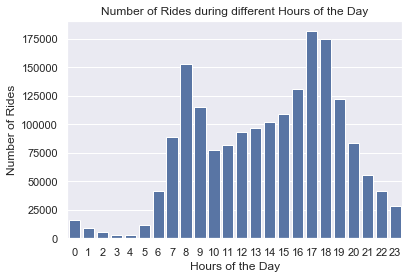

In [184]:
#plot the number of rides per hour of the day
base_color = sb.color_palette()[0]
sb.countplot(data = data_1805_NY, x = 'hour', color = base_color);
plt.xlabel("Hours of the Day")
plt.ylabel("Number of Rides")
plt.title("Number of Rides during different Hours of the Day");

## Observations and next steps
We can see that most of the rides happen in the morning and evening times during the peak hours. A similar pattern can be found when exploring the San Francsico data. Next, I examine distribution of rides across different days of the week.

**Number of Rides Across Different Days of the Week**

In [185]:
#extract the weekdays of each ride, store them in a series and convert series to dataframe
data_1805_NY['weekday'] = data_1805_NY['starttime'].dt.weekday_name

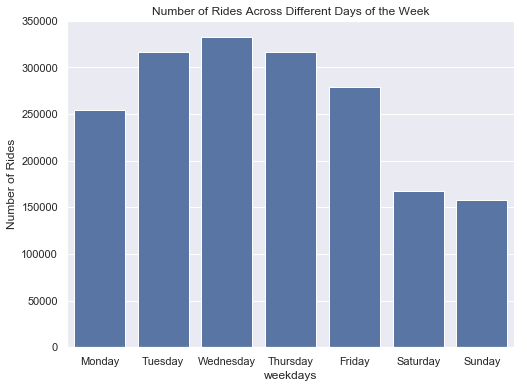

In [186]:
#plot the number of rides in different weekdays
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
base_color = sb.color_palette()[0]
sb.set(rc={'figure.figsize':(8,6)})
sb.countplot(data = data_1805_NY, x = 'weekday', color = base_color, order = order);
plt.xlabel("weekdays")
plt.ylabel("Number of Rides")
plt.title("Number of Rides Across Different Days of the Week");

## Observations and next steps
We can see that most of the rides happen during the working days. Fewer rides happen during the weekends. 

## Bivariate Exploration
Here I want to find answers to the following questions:

* How long does the average trip take?
* Does the above depend on if a user is a subscriber or customer?

At first I'm interested in the trip time between males/females, between different days in a week and between different unser types.

**Trip time of males and females**

In [187]:
#as general info, get value counts of member_gender column
data_1805_NY['gender'].value_counts()

1    1203816
2     421304
0     199590
Name: gender, dtype: int64

In [188]:
#replace values: 1 --> male, 2 --> female, 0 --> unknown
data_1805_NY.gender.replace(1, 'male', inplace=True)

In [189]:
data_1805_NY.gender.replace(2, 'female', inplace=True)
data_1805_NY.gender.replace(0, 'unknown', inplace=True)

In [190]:
data_1805_NY['gender'].value_counts()

male       1203816
female      421304
unknown     199590
Name: gender, dtype: int64

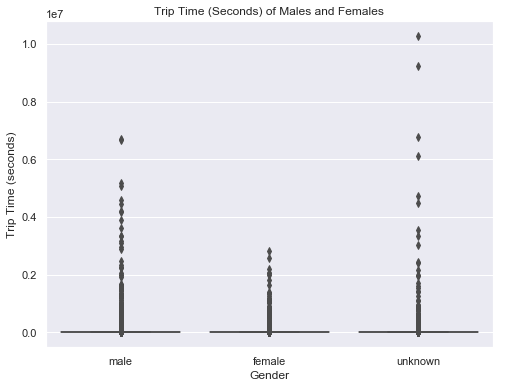

In [191]:
#plot trip time of males and females
sb.boxplot(data = data_1805_NY, x = 'gender', y = 'tripduration', color = base_color);
plt.xlabel("Gender")
plt.ylabel("Trip Time (seconds)")
plt.title("Trip Time (Seconds) of Males and Females");

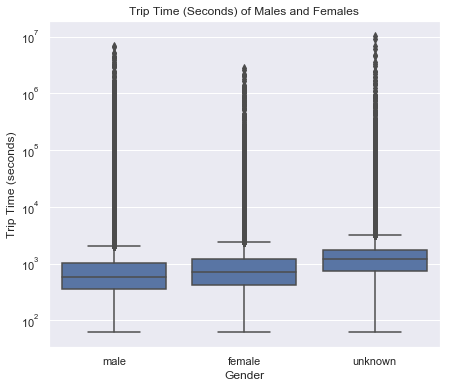

In [192]:
#use log scale to make results visible
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sb.boxplot(data = data_1805_NY, x = 'gender', y = 'tripduration', color = base_color);
plt.xlabel("Gender")
plt.ylabel("Trip Time (seconds)")
plt.title("Trip Time (Seconds) of Males and Females");

In [193]:
data_1805_NY_1 = data_1805_NY.copy()

In [194]:
#exlude the values 'unknown'
options_3 = ['female', 'male']
data_1805_NY_1 = data_1805_NY_1[data_1805_NY_1['gender'].isin(options_3)]

In [195]:
#check if values 'unknown' are excluded
data_1805_NY_1['gender'].value_counts()

male      1203816
female     421304
Name: gender, dtype: int64

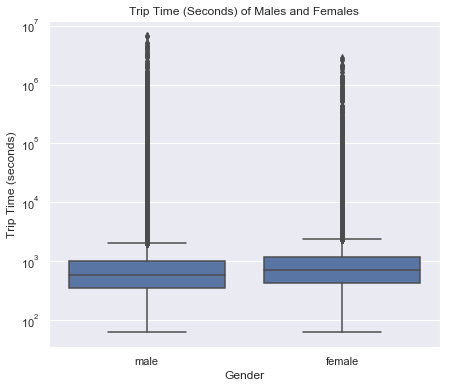

In [196]:
#plot trip time of males and females
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sb.boxplot(data = data_1805_NY_1, x = 'gender', y = 'tripduration', color = base_color);
plt.xlabel("Gender")
plt.ylabel("Trip Time (seconds)")
plt.title("Trip Time (Seconds) of Males and Females");

### Observations and next steps
There are many outliers on the y scale, so I transformed this scale to a log scale. I can see that the median as weel as the values for the first quartile (Q1) and the third quartile (Q3) with regard to the duration of rides conducted by females are higher than by males. Now I want to see duration of rides across different days.

**Trip time across different days of the week**


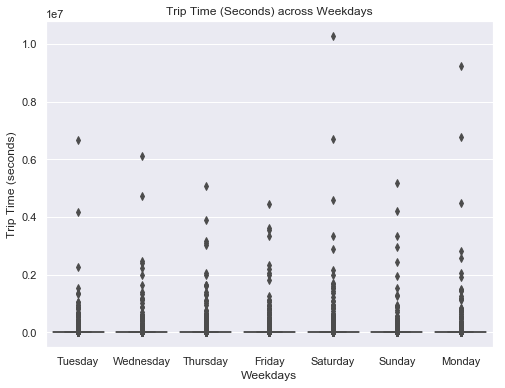

In [197]:
#plot trip time across different days of the week
sb.boxplot(data = data_1805_NY, x = 'weekday', y = 'tripduration', color = base_color);
plt.xlabel("Weekdays")
plt.ylabel("Trip Time (seconds)")
plt.title("Trip Time (Seconds) across Weekdays");

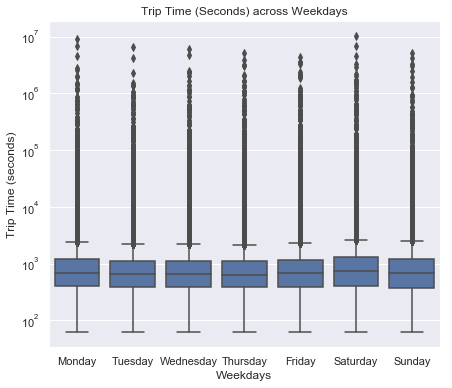

In [198]:
#put weekdays in right order and use log scale
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.boxplot(data = data_1805_NY, x = 'weekday', y = 'tripduration', color = base_color, order = order);
plt.xlabel("Weekdays")
plt.ylabel("Trip Time (seconds)")
plt.title("Trip Time (Seconds) across Weekdays");

In [199]:
#get median of trip time during different weekdays
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
medians = data_1805_NY.groupby(['weekday'])['tripduration'].median()
medians

weekday
Friday       670
Monday       684
Saturday     726
Sunday       669
Thursday     636
Tuesday      643
Wednesday    646
Name: tripduration, dtype: int64

### Observations and next steps
There are many outliers on the y scale, so I transformed this scale to a log scale. I can see that the median as well as the values for Q1 and Q3 with regard to the duration of rides during the weekend are similar, regardless if it's a working day or weekend. Now I want to see duration of rides across different user types.

Duration of rides between different user types

"Subscriber" = Member<br>
"Customer" = Casual

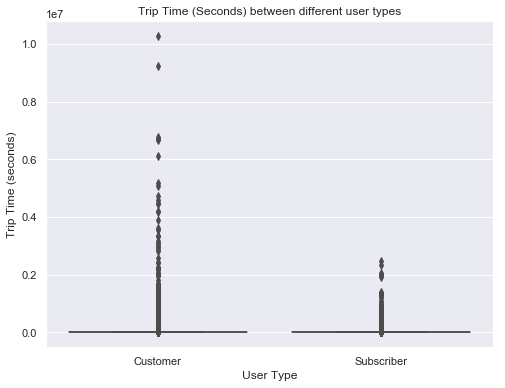

In [200]:
#plot trip time between different user types
sb.boxplot(data = data_1805_NY, x = 'usertype', y = 'tripduration', color = base_color);
plt.xlabel("User Type")
plt.ylabel("Trip Time (seconds)")
plt.title("Trip Time (Seconds) between different user types");

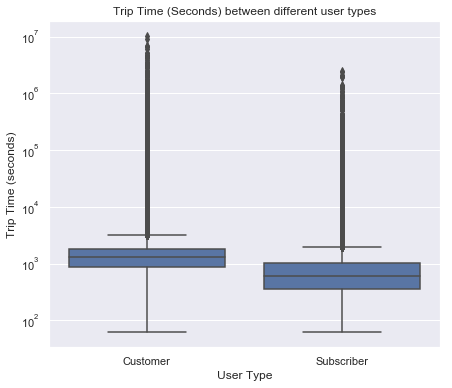

In [201]:
#plot trip time between different user types with a log scale
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sb.boxplot(data = data_1805_NY, x = 'usertype', y = 'tripduration', color = base_color);
plt.xlabel("User Type")
plt.ylabel("Trip Time (seconds)")
plt.title("Trip Time (Seconds) between different user types");

In [202]:
#get median of trip time between different user types
medians = data_1805_NY.groupby(['usertype'])['tripduration'].median()
medians

usertype
Customer      1314
Subscriber     596
Name: tripduration, dtype: int64

### Observations and next steps
There are many outliers on the y scale, so I transformed this scale to a log scale. I can see that the median as well as the values for Q1 and Q3 with regard to the duration of rides of customers are higher than of subscribers. Now I want to see the distribution of customer's and subscriber's rides across different days.

In [203]:
data_1805_NY.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,hour,weekday
0,367,2018-05-01 05:06:16.584,2018-05-01 05:12:23.965,72,W 52 St & 11 Ave,40.767272,-73.993929,514,12 Ave & W 40 St,40.760875,-74.002777,30567,Subscriber,1965,male,5,Tuesday
1,1313,2018-05-01 06:25:49.425,2018-05-01 06:47:42.712,72,W 52 St & 11 Ave,40.767272,-73.993929,426,West St & Chambers St,40.717548,-74.013221,18965,Subscriber,1956,male,6,Tuesday
2,1798,2018-05-01 06:40:26.445,2018-05-01 07:10:25.179,72,W 52 St & 11 Ave,40.767272,-73.993929,3435,Grand St & Elizabeth St,40.718822,-73.995960,30241,Subscriber,1959,female,6,Tuesday
3,518,2018-05-01 07:06:02.973,2018-05-01 07:14:41.004,72,W 52 St & 11 Ave,40.767272,-73.993929,477,W 41 St & 8 Ave,40.756405,-73.990026,28985,Subscriber,1986,male,7,Tuesday
4,109,2018-05-01 07:26:32.345,2018-05-01 07:28:21.542,72,W 52 St & 11 Ave,40.767272,-73.993929,530,11 Ave & W 59 St,40.771522,-73.990541,14556,Subscriber,1991,male,7,Tuesday


In [204]:
#get ride counts of 2 user types per weekday
users = data_1805_NY.groupby(['weekday'])['usertype'].value_counts()
users

weekday    usertype  
Friday     Subscriber    240678
           Customer       38245
Monday     Subscriber    216097
           Customer       37812
Saturday   Subscriber    126986
           Customer       40501
Sunday     Subscriber    125923
           Customer       31819
Thursday   Subscriber    286764
           Customer       30140
Tuesday    Subscriber    284722
           Customer       32050
Wednesday  Subscriber    300946
           Customer       32027
Name: usertype, dtype: int64

In [205]:
#convert series to dataframe
df_users = users.to_frame()
df_users

usertype
weekday   usertype            
Friday    Subscriber    240678
          Customer       38245
Monday    Subscriber    216097
          Customer       37812
Saturday  Subscriber    126986
          Customer       40501
Sunday    Subscriber    125923
          Customer       31819
Thursday  Subscriber    286764
          Customer       30140
Tuesday   Subscriber    284722
          Customer       32050
Wednesday Subscriber    300946
          Customer       32027

In [206]:
#rename columns
df_users.rename(columns={'usertype':'ride_counts'}, inplace=True)

In [207]:
df_users

ride_counts
weekday   usertype               
Friday    Subscriber       240678
          Customer          38245
Monday    Subscriber       216097
          Customer          37812
Saturday  Subscriber       126986
          Customer          40501
Sunday    Subscriber       125923
          Customer          31819
Thursday  Subscriber       286764
          Customer          30140
Tuesday   Subscriber       284722
          Customer          32050
Wednesday Subscriber       300946
          Customer          32027

In [208]:
#adjust rows and columns
df_users_1 = df_users.unstack(level=1)
df_users_1

ride_counts           
usertype     Customer Subscriber
weekday                         
Friday          38245     240678
Monday          37812     216097
Saturday        40501     126986
Sunday          31819     125923
Thursday        30140     286764
Tuesday         32050     284722
Wednesday       32027     300946

In [209]:
#simplify column levels
df_users_1.columns = df_users_1.columns.droplevel(0)

In [210]:
df_users_1

usertype,Customer,Subscriber
weekday,,
Friday,38245,240678
Monday,37812,216097
Saturday,40501,126986
Sunday,31819,125923
Thursday,30140,286764
Tuesday,32050,284722
Wednesday,32027,300946


In [211]:
#change order of the rows
df_users_1.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

usertype,Customer,Subscriber
weekday,,
Monday,37812,216097
Tuesday,32050,284722
Wednesday,32027,300946
Thursday,30140,286764
Friday,38245,240678
Saturday,40501,126986
Sunday,31819,125923


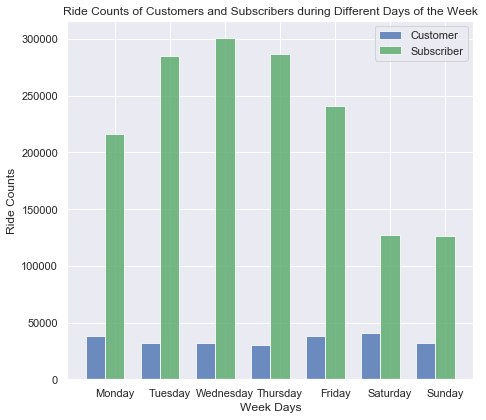

In [212]:
#data to plot
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_users_1
n_groups = 7

#create plot
fig, ax = plt.subplots(figsize=(7, 6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, df_users_1.loc[order].Customer, bar_width,
                alpha=opacity,
                color='b',
                label='Customer')

rects2 = plt.bar(index + bar_width, df_users_1.loc[order].Subscriber, bar_width,
                alpha=opacity,
                color='g',
                label='Subscriber')

plt.xlabel('Week Days')
plt.ylabel('Ride Counts')
plt.title('Ride Counts of Customers and Subscribers during Different Days of the Week')
plt.xticks(index + bar_width, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.legend()

plt.tight_layout()
plt.show()

### Observed Relationships and variation of features in the dataset
In this part of the observation, I was mainly interested in different trip times between males and females as well as between user groups (customers and subscribers). From the plots above, I realized that the median of trip duration for females is slightly higher than for males and that the median of trip duration for customers is higher than for subscribers. The medion of trip duration during the weekend is similar to the trip time during working days.


### Interesting relationship between other features
I observed one interesting relationship between ride counts of different user groups during different days of the week. The ride counts of subscribers are much higher during the working days and less during the weekend. In contrast to that, the ride counts of customers are less during Monday to Tuesday and higher especially on Friday and Saturday. I think that most of the subscribers are using the bike in order to commute from their home to the office, but they might use it less frequently for leisure purpose.

### Additional question
I'm also interested in the average trip time, depending on different ages of the users. Here I plan to separate the users into different age groups. 

In [213]:
data_1805_NY.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,hour,weekday
0,367,2018-05-01 05:06:16.584,2018-05-01 05:12:23.965,72,W 52 St & 11 Ave,40.767272,-73.993929,514,12 Ave & W 40 St,40.760875,-74.002777,30567,Subscriber,1965,male,5,Tuesday
1,1313,2018-05-01 06:25:49.425,2018-05-01 06:47:42.712,72,W 52 St & 11 Ave,40.767272,-73.993929,426,West St & Chambers St,40.717548,-74.013221,18965,Subscriber,1956,male,6,Tuesday
2,1798,2018-05-01 06:40:26.445,2018-05-01 07:10:25.179,72,W 52 St & 11 Ave,40.767272,-73.993929,3435,Grand St & Elizabeth St,40.718822,-73.995960,30241,Subscriber,1959,female,6,Tuesday
3,518,2018-05-01 07:06:02.973,2018-05-01 07:14:41.004,72,W 52 St & 11 Ave,40.767272,-73.993929,477,W 41 St & 8 Ave,40.756405,-73.990026,28985,Subscriber,1986,male,7,Tuesday
4,109,2018-05-01 07:26:32.345,2018-05-01 07:28:21.542,72,W 52 St & 11 Ave,40.767272,-73.993929,530,11 Ave & W 59 St,40.771522,-73.990541,14556,Subscriber,1991,male,7,Tuesday


In [214]:
#create a series from the column birth_year
birth_year_series = data_1805_NY['birth_year']

#define function
def year_cat(x):
    if x < 1959:
        return "over 60"
    elif x <= 1979:
        return "over 40"
    elif x <= 1999:
        return "over 20"
    else:
        return "younger than 20"
    
#create a new column in data_1805_NY
data_1805_NY['age_group'] = birth_year_series.apply(year_cat)
    

In [215]:
data_1805_NY.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,hour,weekday,age_group
0,367,2018-05-01 05:06:16.584,2018-05-01 05:12:23.965,72,W 52 St & 11 Ave,40.767272,-73.993929,514,12 Ave & W 40 St,40.760875,-74.002777,30567,Subscriber,1965,male,5,Tuesday,over 40
1,1313,2018-05-01 06:25:49.425,2018-05-01 06:47:42.712,72,W 52 St & 11 Ave,40.767272,-73.993929,426,West St & Chambers St,40.717548,-74.013221,18965,Subscriber,1956,male,6,Tuesday,over 60
2,1798,2018-05-01 06:40:26.445,2018-05-01 07:10:25.179,72,W 52 St & 11 Ave,40.767272,-73.993929,3435,Grand St & Elizabeth St,40.718822,-73.995960,30241,Subscriber,1959,female,6,Tuesday,over 40
3,518,2018-05-01 07:06:02.973,2018-05-01 07:14:41.004,72,W 52 St & 11 Ave,40.767272,-73.993929,477,W 41 St & 8 Ave,40.756405,-73.990026,28985,Subscriber,1986,male,7,Tuesday,over 20
4,109,2018-05-01 07:26:32.345,2018-05-01 07:28:21.542,72,W 52 St & 11 Ave,40.767272,-73.993929,530,11 Ave & W 59 St,40.771522,-73.990541,14556,Subscriber,1991,male,7,Tuesday,over 20


In [216]:
data_1805_NY['age_group'].value_counts()

over 20            944260
over 40            778254
over 60             96748
younger than 20      5448
Name: age_group, dtype: int64

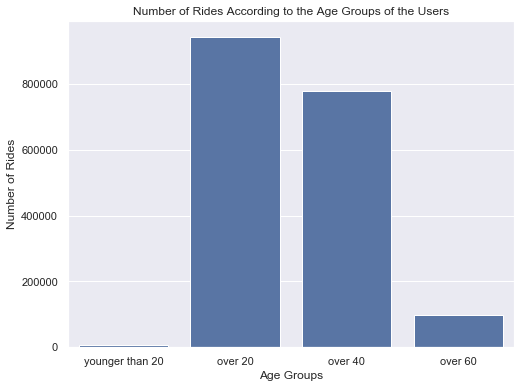

In [217]:
#plot the number of rides according to the age groups of the users
base_color = sb.color_palette()[0]
order = ['younger than 20', 'over 20', 'over 40', 'over 60']
sb.countplot(data = data_1805_NY, x = 'age_group', color = base_color, order = order);
plt.xlabel("Age Groups")
plt.ylabel("Number of Rides")
plt.title("Number of Rides According to the Age Groups of the Users");

### Observations and next steps
from the numbers and plot above, we can see that the majorities of rides in New York in May 2018 have been conducted by people between 20 and 40 years. But how are their rides distributed across different days of the week (four bars per day)

In [218]:
#get ride counts of four age groups per weekday
ride_age = data_1805_NY.groupby(['weekday'])['age_group'].value_counts()
ride_age

weekday    age_group      
Friday     over 20            141562
           over 40            122247
           over 60             14280
           younger than 20       834
Monday     over 20            129403
           over 40            110234
           over 60             13519
           younger than 20       753
Saturday   over 20             86380
           over 40             72983
           over 60              7596
           younger than 20       528
Sunday     over 20             84837
           over 40             65056
           over 60              7341
           younger than 20       508
Thursday   over 20            165349
           over 40            133171
           over 60             17409
           younger than 20       975
Tuesday    over 20            163687
           over 40            134523
           over 60             17724
           younger than 20       838
Wednesday  over 20            173042
           over 40            140040
           

In [219]:
#convert series to dataframe
df_ride_age = ride_age.to_frame()
df_ride_age

age_group
weekday   age_group                 
Friday    over 20             141562
          over 40             122247
          over 60              14280
          younger than 20        834
Monday    over 20             129403
          over 40             110234
          over 60              13519
          younger than 20        753
Saturday  over 20              86380
          over 40              72983
          over 60               7596
          younger than 20        528
Sunday    over 20              84837
          over 40              65056
          over 60               7341
          younger than 20        508
Thursday  over 20             165349
          over 40             133171
          over 60              17409
          younger than 20        975
Tuesday   over 20             163687
          over 40             134523
          over 60              17724
          younger than 20        838
Wednesday over 20             173042
          over 40             140040
          over 60              18879
          younger than 20       1012

In [220]:
#rename columns
df_ride_age.rename(columns={'age_group':'ride_counts'}, inplace=True)

In [221]:
df_ride_age

ride_counts
weekday   age_group                   
Friday    over 20               141562
          over 40               122247
          over 60                14280
          younger than 20          834
Monday    over 20               129403
          over 40               110234
          over 60                13519
          younger than 20          753
Saturday  over 20                86380
          over 40                72983
          over 60                 7596
          younger than 20          528
Sunday    over 20                84837
          over 40                65056
          over 60                 7341
          younger than 20          508
Thursday  over 20               165349
          over 40               133171
          over 60                17409
          younger than 20          975
Tuesday   over 20               163687
          over 40               134523
          over 60                17724
          younger than 20          838
Wednesday over 20               173042
          over 40               140040
          over 60                18879
          younger than 20         1012

In [222]:
#adjust rows and columns
df_ride_age_1 = df_ride_age.unstack(level=1)
df_ride_age_1


ride_counts                                
age_group     over 20 over 40 over 60 younger than 20
weekday                                              
Friday         141562  122247   14280             834
Monday         129403  110234   13519             753
Saturday        86380   72983    7596             528
Sunday          84837   65056    7341             508
Thursday       165349  133171   17409             975
Tuesday        163687  134523   17724             838
Wednesday      173042  140040   18879            1012

In [223]:
#simplify column levels
df_ride_age_1.columns = df_ride_age_1.columns.droplevel(0)

In [224]:
df_ride_age_1

age_group,over 20,over 40,over 60,younger than 20
weekday,,,,
Friday,141562,122247,14280,834
Monday,129403,110234,13519,753
Saturday,86380,72983,7596,528
Sunday,84837,65056,7341,508
Thursday,165349,133171,17409,975
Tuesday,163687,134523,17724,838
Wednesday,173042,140040,18879,1012


In [225]:
#change order of the rows
df_ride_age_1.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

age_group,over 20,over 40,over 60,younger than 20
weekday,,,,
Monday,129403,110234,13519,753
Tuesday,163687,134523,17724,838
Wednesday,173042,140040,18879,1012
Thursday,165349,133171,17409,975
Friday,141562,122247,14280,834
Saturday,86380,72983,7596,528
Sunday,84837,65056,7341,508


In [226]:
#rename columns
df_ride_age_1.rename(columns={'over 20':'over20', 'over 40':'over40', 'over 60':'over60', 'younger than 20':'below20'}, inplace=True)
df_ride_age_1

age_group,over20,over40,over60,below20
weekday,,,,
Friday,141562,122247,14280,834
Monday,129403,110234,13519,753
Saturday,86380,72983,7596,528
Sunday,84837,65056,7341,508
Thursday,165349,133171,17409,975
Tuesday,163687,134523,17724,838
Wednesday,173042,140040,18879,1012


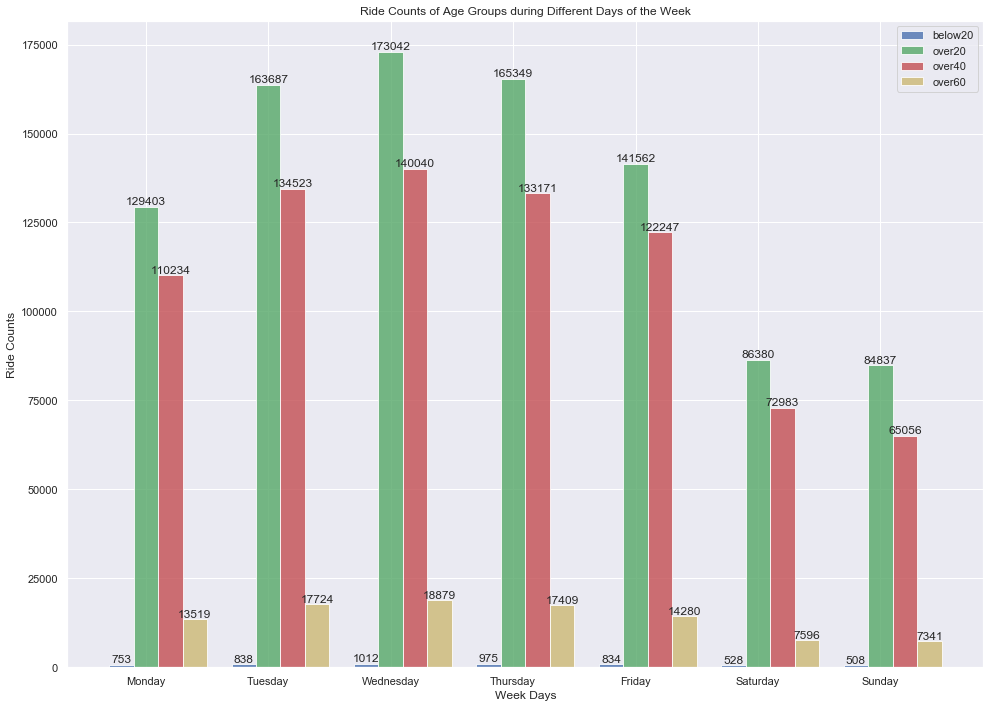

In [227]:
#data to plot
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_ride_age_1
n_groups = 7

#create plot
fig, ax = plt.subplots(figsize=(14, 10))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, df_ride_age_1.loc[order].below20, bar_width,
                alpha=opacity,
                color='b',
                label='below20')

rects2 = plt.bar(index + bar_width, df_ride_age_1.loc[order].over20, bar_width,
                alpha=opacity,
                color='g',
                label='over20')

rects3 = plt.bar(index + 2*bar_width, df_ride_age_1.loc[order].over40, bar_width,
                alpha=opacity,
                color='r',
                label='over40')

rects4 = plt.bar(index + 3*bar_width, df_ride_age_1.loc[order].over60, bar_width,
                alpha=opacity,
                color='y',
                label='over60')

plt.xlabel('Week Days')
plt.ylabel('Ride Counts')
plt.title('Ride Counts of Age Groups during Different Days of the Week')
plt.xticks(index + bar_width, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.legend()

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()

### Observations
from the numbers and plot above, we can see that the majorities of rides in New York in May 2018 have been conducted by people of all age groups during the working days. The amount of rides during the weekend is comparatively smaller, with regard to all age groups.

## Multivariate Exploration
Here I want to find answers to the following questions:
* Where are the stations located and how many biles are rented there during Many 2018?

In [228]:
data_1805_NY.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,hour,weekday,age_group
0,367,2018-05-01 05:06:16.584,2018-05-01 05:12:23.965,72,W 52 St & 11 Ave,40.767272,-73.993929,514,12 Ave & W 40 St,40.760875,-74.002777,30567,Subscriber,1965,male,5,Tuesday,over 40
1,1313,2018-05-01 06:25:49.425,2018-05-01 06:47:42.712,72,W 52 St & 11 Ave,40.767272,-73.993929,426,West St & Chambers St,40.717548,-74.013221,18965,Subscriber,1956,male,6,Tuesday,over 60
2,1798,2018-05-01 06:40:26.445,2018-05-01 07:10:25.179,72,W 52 St & 11 Ave,40.767272,-73.993929,3435,Grand St & Elizabeth St,40.718822,-73.995960,30241,Subscriber,1959,female,6,Tuesday,over 40
3,518,2018-05-01 07:06:02.973,2018-05-01 07:14:41.004,72,W 52 St & 11 Ave,40.767272,-73.993929,477,W 41 St & 8 Ave,40.756405,-73.990026,28985,Subscriber,1986,male,7,Tuesday,over 20
4,109,2018-05-01 07:26:32.345,2018-05-01 07:28:21.542,72,W 52 St & 11 Ave,40.767272,-73.993929,530,11 Ave & W 59 St,40.771522,-73.990541,14556,Subscriber,1991,male,7,Tuesday,over 20


In [229]:
#get start station id's and their counts
station_count = data_1805_NY['start_station_id'].value_counts().reset_index()
station_count.head()

,index,start_station_id
0,519,16729
1,435,12166
2,426,11833
3,402,11336
4,492,11120


In [230]:
station_count.shape

(767, 2)

That means we have 767 unique start stations.

In [231]:
#are there any duplicates?
print(station_count.duplicated().sum())

0


In [232]:
#rename columns
station_count.rename(columns={'index':'start_station_id', 'start_station_id':'ride_counts'}, inplace=True)

In [233]:
station_count.head()

,start_station_id,ride_counts
0,519,16729
1,435,12166
2,426,11833
3,402,11336
4,492,11120


In [234]:
#list start station id's and their longitudes/ latitudes
station_long_lat = data_1805_NY[['start_station_id', 'start_station_longitude', 'start_station_latitude']]

In [235]:
station_long_lat.head()

,start_station_id,start_station_longitude,start_station_latitude
0,72,-73.993929,40.767272
1,72,-73.993929,40.767272
2,72,-73.993929,40.767272
3,72,-73.993929,40.767272
4,72,-73.993929,40.767272


In [236]:
#merge df's station_count and station_long_lat
station = station_count.merge(station_long_lat, on='start_station_id', how='inner')
station.head()

,start_station_id,ride_counts,start_station_longitude,start_station_latitude
0,519,16729,-73.977706,40.751873
1,519,16729,-73.977706,40.751873
2,519,16729,-73.977706,40.751873
3,519,16729,-73.977706,40.751873
4,519,16729,-73.977706,40.751873


In [237]:
#get sum of duplicates
print(station.duplicated().sum())

1823943


In [238]:
station.shape

(1824710, 4)

In [239]:
#drop duplicates
station.drop_duplicates(inplace=True)

In [240]:
station.shape

(767, 4)

In [241]:
#are there any duplicates?
print(station.duplicated().sum())

0


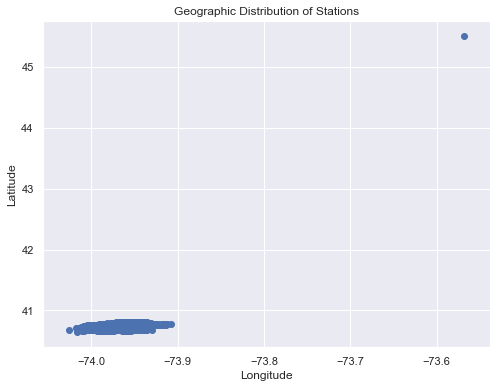

In [242]:
#plot geographic distribution of stations
plt.scatter(data = station, x = 'start_station_longitude', y = 'start_station_latitude');
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Stations");

In [243]:
#only keep rows, where station longitude is smaller than -73.9
station_1 = station[station.start_station_longitude < -73.9]

In [244]:
#how many stations do we have now?
station_1.shape

(766, 4)

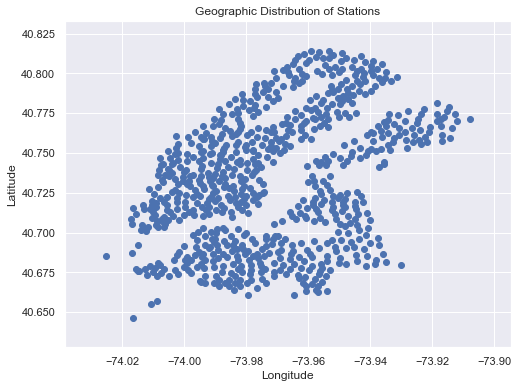

In [245]:
#plot geographic distribution of stations
plt.scatter(data = station_1, x = 'start_station_longitude', y = 'start_station_latitude');
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Stations");

enlarge the size of the plot

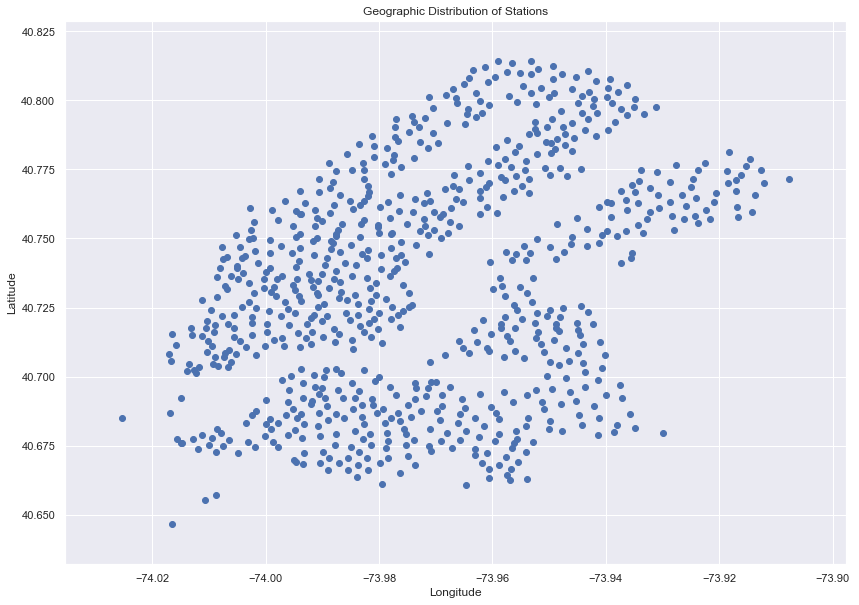

In [246]:
#plot geographic distribution of stations
fig, ax = plt.subplots(figsize=(14, 10))
plt.scatter(data = station_1, x = 'start_station_longitude', y = 'start_station_latitude');
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Stations");

on the northern part of this plot, we can find Manhattan with the Central Park, to its south, we find Brooklyn and Queens.

In [247]:
station_1.ride_counts.median()

1529.0

In [248]:
station_1.describe()

,ride_counts,start_station_longitude,start_station_latitude
count,766.000000,766.000000,766.000000
mean,2382.114883,-73.971668,40.732797
std,2263.564767,0.024251,0.040461
min,1.000000,-74.025353,40.646538
25%,709.750000,-73.990680,40.696377
50%,1529.000000,-73.974174,40.732226
75%,3649.500000,-73.953031,40.764399
max,16729.000000,-73.907744,40.814394


In [249]:
p = np.percentile(station_1.ride_counts, 25)
p

709.75

Next, I generalize the number of rides into 4 different categories (below 25 percentile, below 50 percentile, below 75 percentile, above 75 percentile), in order to improve the readability of the below plots:

In [250]:
#create a series from the column ride_counts
ride_counts_series = station_1['ride_counts']

#define function
def f_cat(x):
    if x < 710:
        return 100
    elif x <= 1530:
        return 200
    elif x <= 3650:
        return 300
    else:
        return 400

#create a new column in station_1
station_1['count_cat'] = ride_counts_series.apply(f_cat)

c:\users\martin\anaconda2\envs\data-4\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [251]:
station_1.tail(100)

,start_station_id,ride_counts,start_station_longitude,start_station_latitude,count_cat
1797260,3493,431,-73.938915,40.799139,100
1797691,3515,431,-73.918544,40.774591,100
1798122,3401,430,-73.993314,40.672481,100
1798552,3608,429,-73.956600,40.742374,100
1798981,3676,426,-74.014726,40.675833,100
1799407,3069,425,-73.948186,40.704118,100
1799832,3563,422,-73.932719,40.757186,100
1800254,3598,420,-73.914268,40.759570,100
1800674,3504,416,-73.937900,40.802926,100
1801090,3606,413,-73.948852,40.742520,100
